In [3]:
#Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the data
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()
#The continuous features are- ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_Term,Credit_History
#Categorical features are- Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()
#From the below result, we can notice that the columns- Gender,Married,Dependents, Self_Employed, LoanAmount, Loan_Amount_Term,Credit_History have missing values


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Univariate Analysis

In [5]:
#Analyzing Continuous Features
df_cont=df.select_dtypes(include=["int64","float64"])

In [10]:
df_cont["LoanAmount"].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

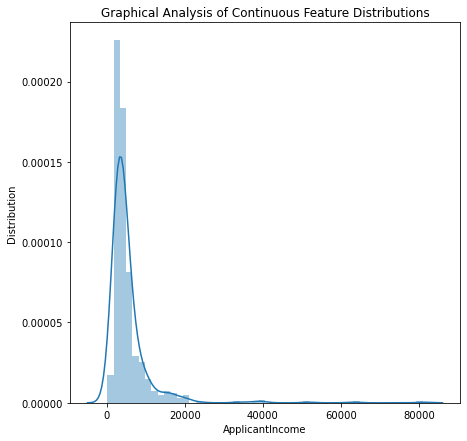

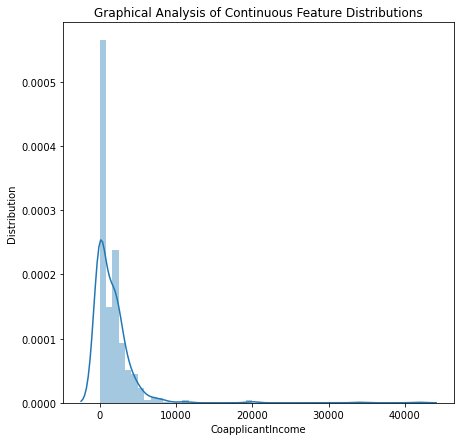

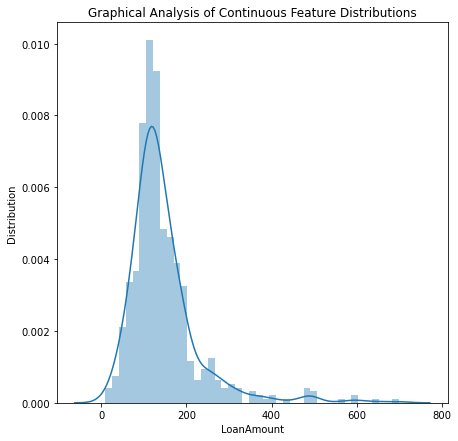

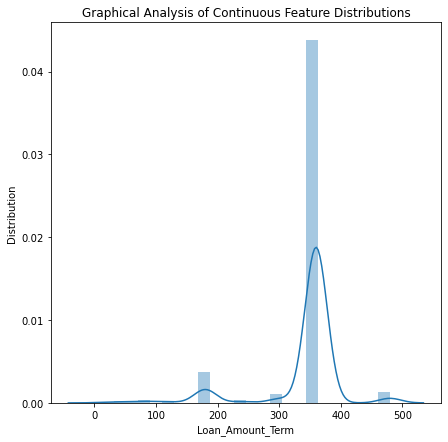

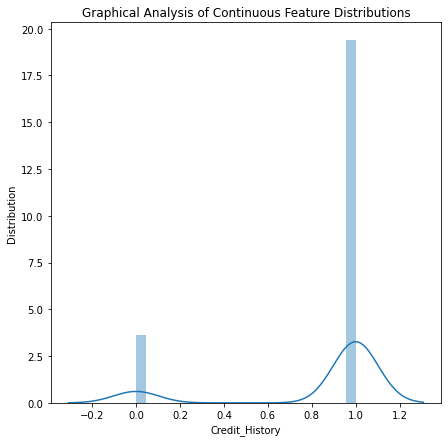

In [6]:
c1=df_cont.columns.values
for i in c1:
    plt.figure(figsize=(7,7))
    sns.distplot(df_cont[i])
    plt.xlabel(i)
    plt.ylabel("Distribution")
    plt.title("Graphical Analysis of Continuous Feature Distributions")
    plt.show()
    
    #Applicant Income is a highly skewed feature where most values are from 0 to 20000
    #Coapplicant Income had distribution from 0 to 12000
    #The applicants in the database have apllied for a loan amount ranging till 700 but most of the values are ranging from 10 
    #to 300 and small distributions around 400 and 600.
    #Loan Amount Term has one high peak at 350 followed by one peak at 180 and 2 smaller peaks from 270-300 and 450-470
    #Majority of the applicants have a credit history of 1.0

In [11]:
df["Gender"]=df["Gender"].astype("str")
df["Married"]=df["Married"].astype("str")
df["Dependents"]=df["Dependents"].astype("str")
df["Education"]=df["Education"].astype("str")
df["Self_Employed"]=df["Self_Employed"].astype("str")
df["Property_Area"]=df["Property_Area"].astype("str")
df["Loan_Status"]=df["Loan_Status"].astype("str")

Text(0, 0.5, 'Distribution')

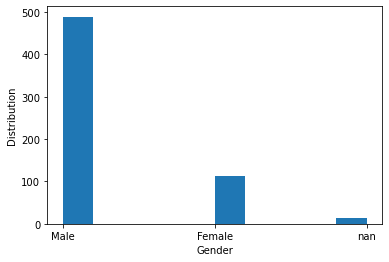

In [12]:
plt.hist(df["Gender"])
plt.xlabel("Gender")
plt.ylabel("Distribution")

#Around 480 applicants are Male and 120 applicants are females, there are few null values which have to be catered.

Text(0, 0.5, 'Distribution')

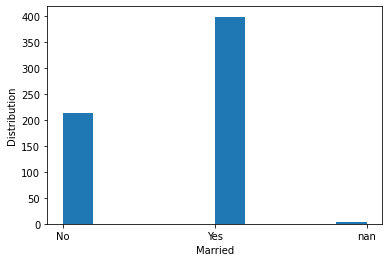

In [62]:
plt.hist(df["Married"])
plt.xlabel("Married")
plt.ylabel("Distribution")

#Majority of the applicants are married and around 210 applicants are not married.

Text(0, 0.5, 'Distribution')

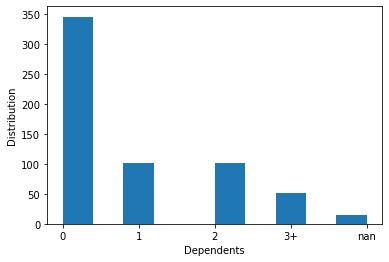

In [63]:
plt.hist(df["Dependents"])
plt.xlabel("Dependents")
plt.ylabel("Distribution")

#340 applicants do no have dependents, 100 applicants have a single dependent, 100 applicants have 2 dependents and few have 3+ dependents

Text(0, 0.5, 'Distribution')

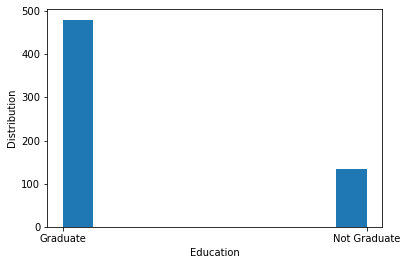

In [64]:
plt.hist(df["Education"])
plt.xlabel("Education")
plt.ylabel("Distribution")

#Applicants of around 480 are graduates and 140 are not graduates

Text(0, 0.5, 'Distribution')

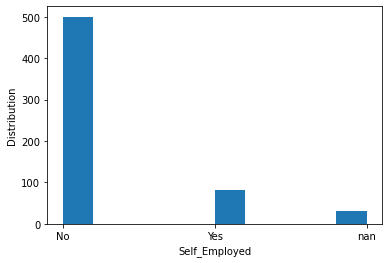

In [65]:
plt.hist(df["Self_Employed"])
plt.xlabel("Self_Employed")
plt.ylabel("Distribution")

#Many applicants are not self-employed and around 70 applicants are self-employed.

Text(0, 0.5, 'Distribution')

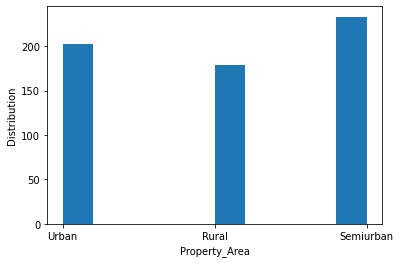

In [66]:
plt.hist(df["Property_Area"])
plt.xlabel("Property_Area")
plt.ylabel("Distribution")

#The applicants have properties mostly in semiurban areas followed by urban areas and rural areas.

Text(0, 0.5, 'Distribution')

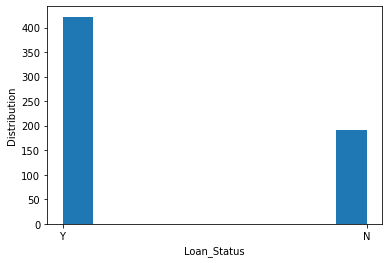

In [67]:
plt.hist(df["Loan_Status"])
plt.xlabel("Loan_Status")
plt.ylabel("Distribution")

#Approximately 420 applicant's loan status is positive and 180 applicant's loan status is negative.

# Bivariate Analysis

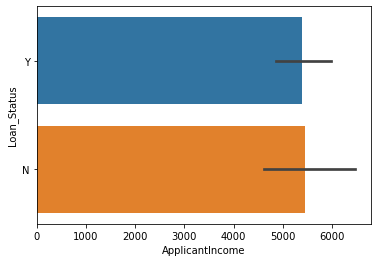

In [81]:
sns.barplot(x=df["ApplicantIncome"],y=df["Loan_Status"],data=df)
plt.show()

#Ther is equal share of positive loan status and negative loan status for income ranging from 0 to 5500

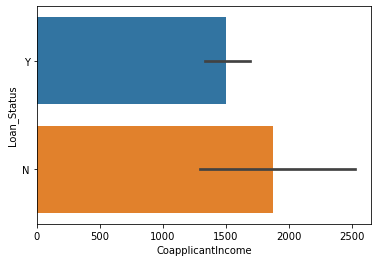

In [72]:
sns.barplot(x=df["CoapplicantIncome"],y=df["Loan_Status"],data=df)
plt.show()

#CoapplicantIncome from 1480 to 1890 have a higher positive loan status

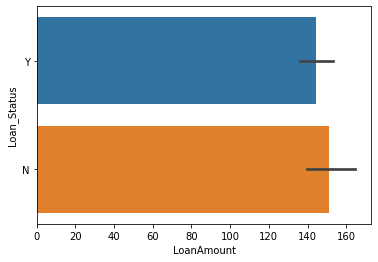

In [79]:
sns.barplot(x=df["LoanAmount"],y=df["Loan_Status"],data=df)
plt.show()

#When the loan amount is from 140-150 the loan status is positive 

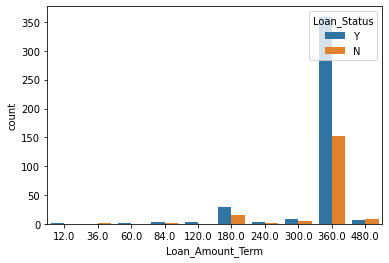

In [75]:
sns.countplot(x=df["Loan_Amount_Term"],hue=df["Loan_Status"],data=df)
plt.show()

#Loan_Amount_Term of 360 has a more positive status than the other terms, for 180 loan amount term the status is positive than negative

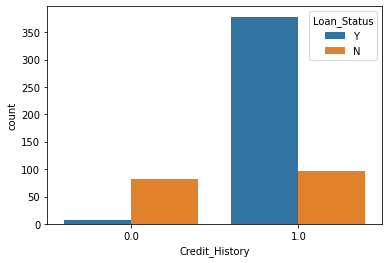

In [82]:
sns.countplot(x=df["Credit_History"],hue=df["Loan_Status"],data=df)
plt.show()

#For Credit History 1 the loan status is positive than negative, when credit history is 0 tha loan status is negative than positive

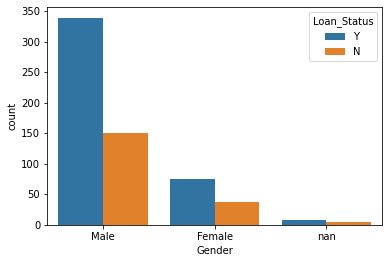

In [84]:
sns.countplot(x=df["Gender"],hue=df["Loan_Status"],data=df)
plt.show()

#Males have more positive loan status than women 

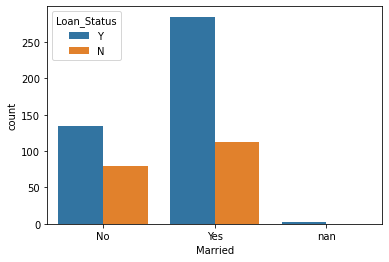

In [86]:
sns.countplot(x=df["Married"],hue=df["Loan_Status"],data=df)
plt.show()

#Applicants who are married have higher chance of positive loan status assuming it is due to coapplicant's income support

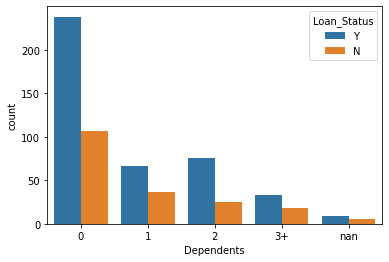

In [87]:
sns.countplot(x=df["Dependents"],hue=df["Loan_Status"],data=df)
plt.show()

#Applicants with no dependents have a higher loan positive status followed by applicants with 2 dependents and 1.

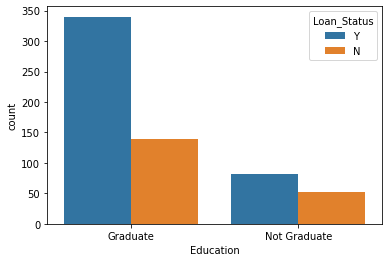

In [88]:
sns.countplot(x=df["Education"],hue=df["Loan_Status"],data=df)
plt.show()

#Graduates have a higher positive loan status than non-graduates, owing to the increase in employability.

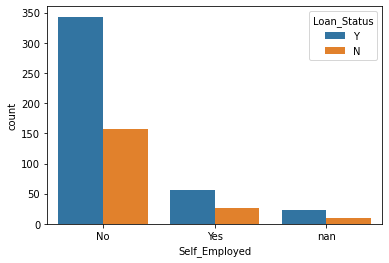

In [89]:
sns.countplot(x=df["Self_Employed"],hue=df["Loan_Status"],data=df)
plt.show()

#Applicants who are self-employed have very low chance of loan positive status than applicants who are not self-employeds

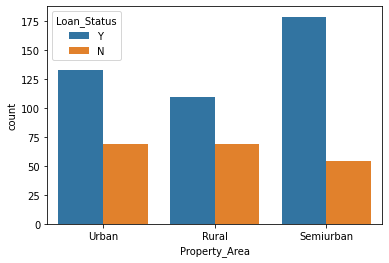

In [90]:
sns.countplot(x=df["Property_Area"],hue=df["Loan_Status"],data=df)
plt.show()

#Applicants who have a property in semiurban areas have better land value and indirectly have a positive effect on the loan status
#followed by urban areas and rural areas.

# Multivariate Analysis

In [93]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='LoanAmount', ylabel='Married'>

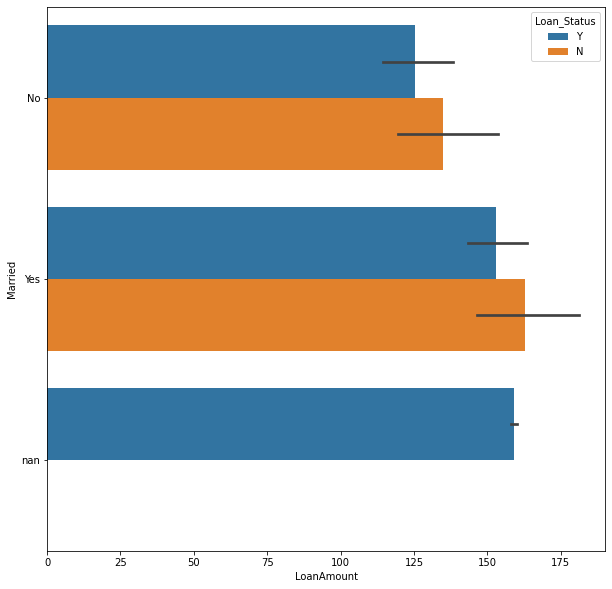

In [113]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['LoanAmount'],y=df['Married'],hue=df['Loan_Status'])

#Married Applicants with high loan amount have less chance of positive loan status, there are nan values which will be catered to

<AxesSubplot:xlabel='LoanAmount', ylabel='Gender'>

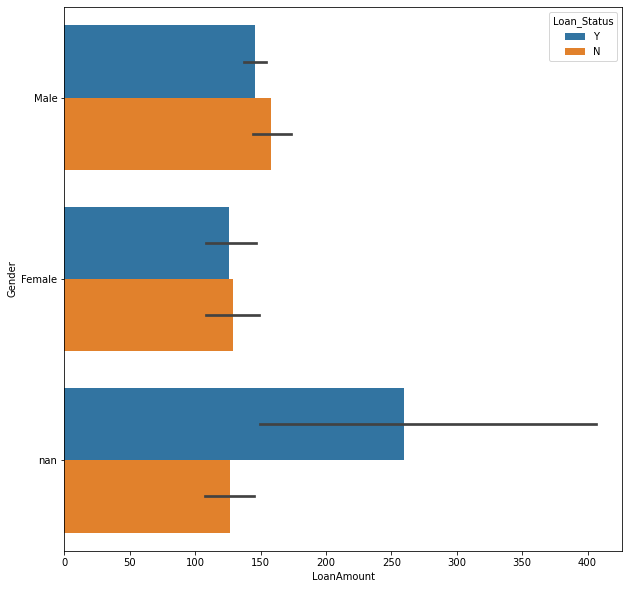

In [114]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['LoanAmount'],y=df['Gender'],hue=df['Loan_Status'])

#Males with high loan amount have less positive loan status than negative
#Females have less loan amount compared to males and have almost equal positive and negative loan status

<AxesSubplot:xlabel='LoanAmount', ylabel='Dependents'>

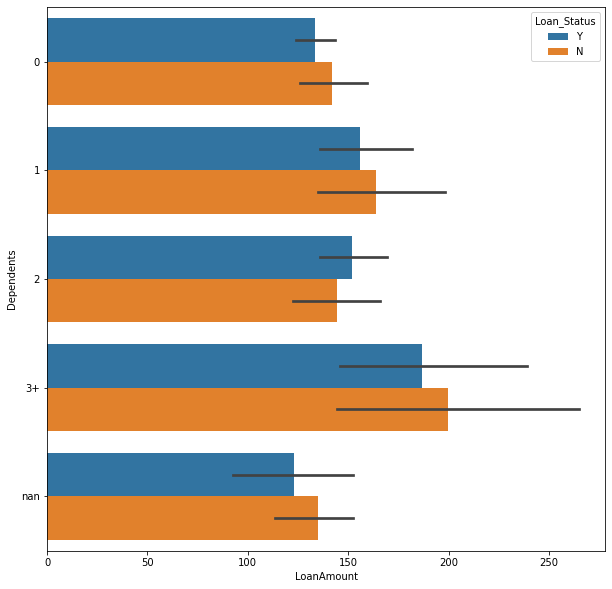

In [115]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['LoanAmount'],y=df['Dependents'],hue=df['Loan_Status'])

#Applicants with 0 dependents have less loan amount and higher negative status 
#Applicants with 3+ dependents have high loan amount and higher negative status followed by people with 1 dependents and 2 dependendents

<AxesSubplot:xlabel='LoanAmount', ylabel='Education'>

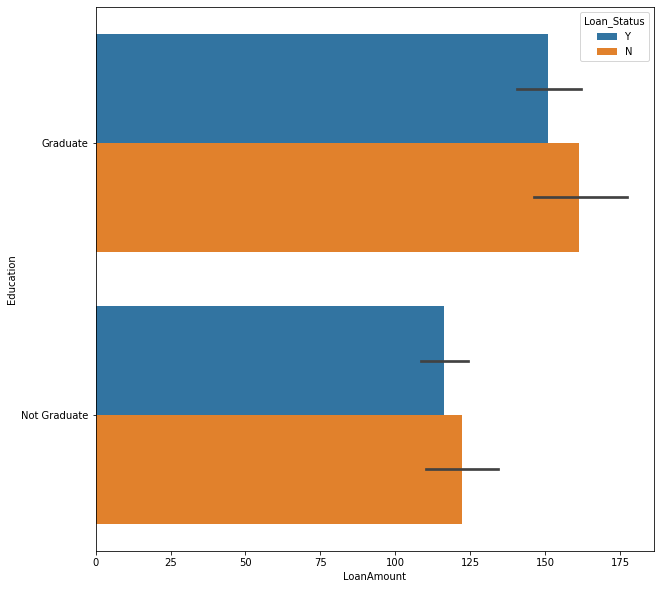

In [117]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['LoanAmount'],y=df['Education'],hue=df['Loan_Status'])

#Graduates have higher loan amount and higher negative status than positive status
#Non-graduates have lower loan amount.

<AxesSubplot:xlabel='LoanAmount', ylabel='Self_Employed'>

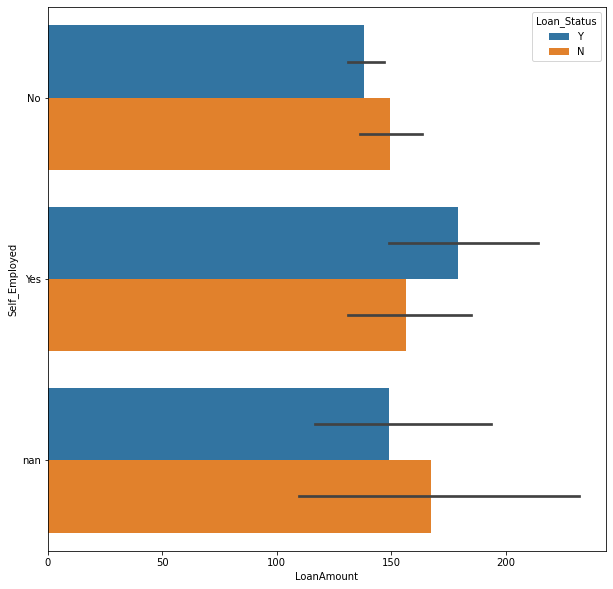

In [118]:
plt.figure(figsize=(10,10))
sns.barplot(x=df['LoanAmount'],y=df['Self_Employed'],hue=df['Loan_Status'])

#Self-employed applicants have higher loan amount and higher negative status than positive status
#Applicants who are not self-employed have lower loan amount and higher negative loan status than positive loan status 

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

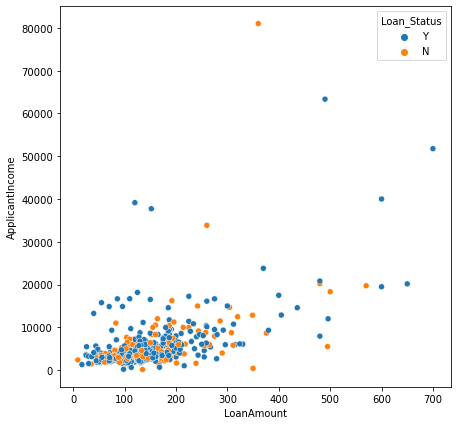

In [127]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['LoanAmount'],y=df['ApplicantIncome'],hue=df['Loan_Status'])

#When the loan amount and applicant income is less the positive loan status is high 
#There are few applicants with high loan amount and high income who have high positive status

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

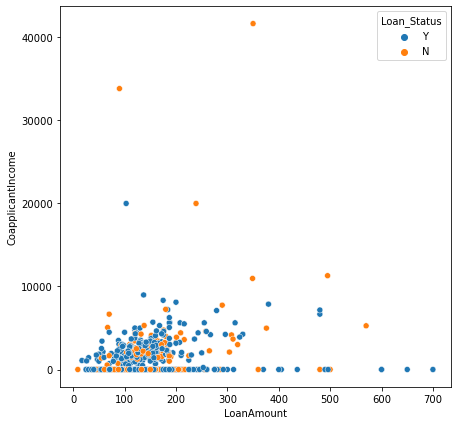

In [128]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['LoanAmount'],y=df['CoapplicantIncome'],hue=df['Loan_Status'])

#For less loan amount and less coapplicant income the status is positive 
#There are few high loan amount with high coapplicant income the status negative

<AxesSubplot:xlabel='LoanAmount', ylabel='Credit_History'>

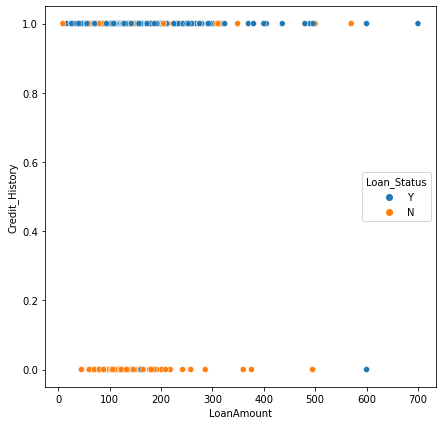

In [132]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['LoanAmount'],y=df['Credit_History'],hue=df['Loan_Status'])

#When loan amount is high for credit 1 the positive loan status is high 
#When the loan amount is less for credit 0 the status is negative

<AxesSubplot:xlabel='LoanAmount', ylabel='Property_Area'>

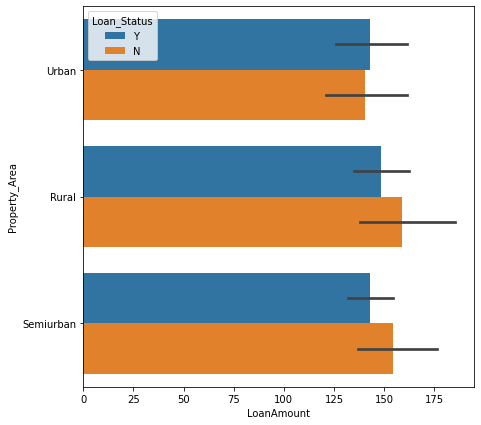

In [133]:
plt.figure(figsize=(7,7))
sns.barplot(x=df['LoanAmount'],y=df['Property_Area'],hue=df['Loan_Status'])

#Applicants with high loan amount who have property in rural areas have higher negative status followed by semi-urban and urban

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

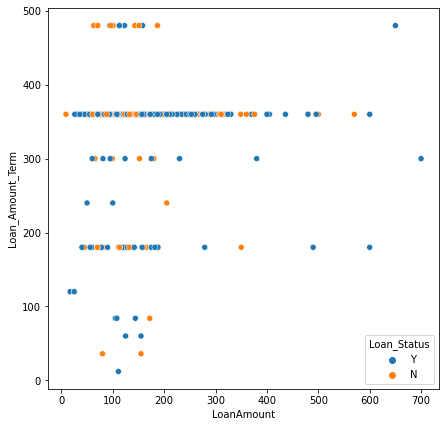

In [134]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['LoanAmount'],y=df['Loan_Amount_Term'],hue=df['Loan_Status'])

#When the loan amount is less and the loan amount term is high the negative status is high 
#For less loan amount and term 360 the positive status is high 

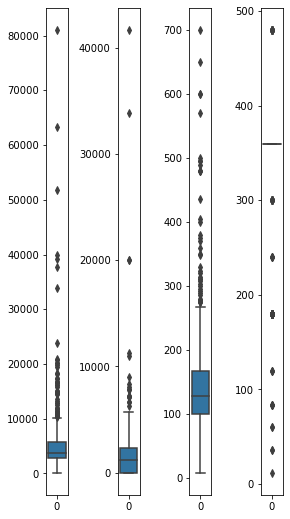

In [202]:
columnlist=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']
ncol=30
nrows=14

#Plotting box plots for the numerical features to check for outliers.
plt.figure(figsize=(30,100))
for i in range(0, len(columnlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[columnlist[i]])
    plt.tight_layout()
    
    
#From the below results, we can identify data points beyond the range

# Summary of Data Analysis

1. The given dataset has 614 rows and 13 columns.
2. 8 rows are of object data type and 4 rows are of float data type and 1 row is integer data type.
3. Among the 13 columns, Loan_ID is not required for model development since it is unique id for each loan application.
4. Target is Loan_Status which has to be predicted using the 11 features.
5. The columns with null values are -Gender, Married, Dependents, Self-Employed,Loan_Amount,Loan_Amount_Term,Credit_history.
6. Otliers are present which has to be eliminated using z-score.
7. The categorical features will be encoded.

# Data Cleaning

In [6]:
#Catering to the missing values
df["Gender"]=df["Gender"].fillna(df["Gender"].dropna().mode().values[0])
df["Married"]=df["Married"].fillna(df["Married"].dropna().mode().values[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].dropna().mode().values[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].dropna().mode().values[0])
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].dropna().mean())
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].dropna().mean())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].dropna().mode().values[0])

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.drop("Loan_ID",axis=1,inplace=True)

# Encoding Categorical Columns

In [9]:
cat=[i for i in df.columns if df[i].dtypes=="object"]

In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in cat:
    df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

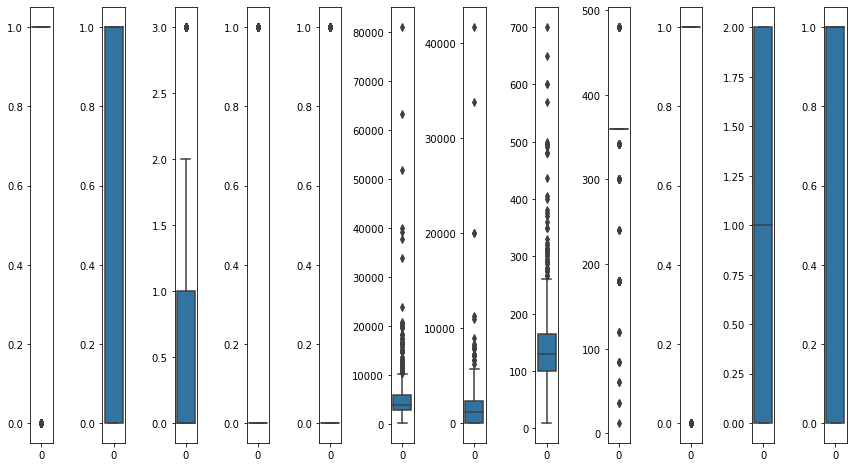

In [11]:
#Plotting a box plot to check the outliers

columnlist=df.columns.values

ncol=30
nrows=14

#Plotting box plots for the features-Length,Diameter, Height, Whole Weight, Shucked Weight, Viscera Weight, Shell Weight
plt.figure(figsize=(ncol, 3*ncol))
for i in range(0, len(columnlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[columnlist[i]])
    plt.tight_layout()

In [12]:
#Checking Z-Score for Outliers
from scipy import stats

z1=abs(stats.zscore(df[columnlist]))

In [13]:
x=np.where(z1>3)
x

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
        7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
       dtype=int64))

In [14]:
df_z=df[(z1 < 3).all(axis=1)]

In [15]:
print(df.shape,df_z.shape)

(614, 12) (577, 12)


# Balancing the output

In [16]:
df_z["Loan_Status"].value_counts()

1.0    398
0.0    179
Name: Loan_Status, dtype: int64

In [17]:
from sklearn.utils import resample
dfminor_output=df_z[(df_z["Loan_Status"]==0)]
dfmajor_output=df_z[(df_z["Loan_Status"]==1)]
dfmin_up=resample(dfminor_output,replace=True,n_samples=398,random_state=42)
df_up=pd.concat([dfmin_up,dfmajor_output])

In [18]:
df_up.corr()["Loan_Status"].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.526573
Married              0.081108
Property_Area        0.071508
CoapplicantIncome    0.069893
Gender               0.041043
Dependents           0.009987
Self_Employed       -0.011421
ApplicantIncome     -0.016190
Education           -0.030654
LoanAmount          -0.045656
Loan_Amount_Term    -0.059871
Name: Loan_Status, dtype: float64

In [26]:
df_up

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
367,1.0,0.0,0.0,0.0,0.0,5124,0.0,124.000000,342.0,0.0,0.0,0.0
340,1.0,1.0,3.0,1.0,0.0,2647,1587.0,173.000000,360.0,1.0,0.0,0.0
48,0.0,1.0,0.0,0.0,0.0,2645,3440.0,120.000000,360.0,0.0,2.0,0.0
387,1.0,1.0,0.0,1.0,0.0,3010,3136.0,146.412162,360.0,0.0,2.0,0.0
251,0.0,0.0,2.0,0.0,0.0,3427,0.0,138.000000,360.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
608,1.0,1.0,0.0,0.0,0.0,3232,1950.0,108.000000,360.0,1.0,0.0,1.0
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.000000,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.000000,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.000000,360.0,1.0,2.0,1.0


In [19]:
df_up.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [20]:
df_f=df_up.copy()

In [21]:
#Splitting features and target
X=df_f.drop("Loan_Status",axis=1)
Y=df_f[["Loan_Status"]]

In [22]:
#Checking the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"]=X.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

              feature        VIF
0              Gender   5.867757
1             Married   3.623333
2          Dependents   1.794001
3           Education   1.306738
4       Self_Employed   1.231385
5     ApplicantIncome   5.532640
6   CoapplicantIncome   2.438037
7          LoanAmount  11.316455
8    Loan_Amount_Term  10.696957
9      Credit_History   4.122631
10      Property_Area   2.442841


In [23]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xnew=sc.fit_transform(X)

X_s=pd.DataFrame(Xnew,columns=X.columns)

In [24]:
#Applying power transform
from sklearn.preprocessing import power_transform
Xt=power_transform(X_s)

X_pt=pd.DataFrame(Xt,columns=X_s.columns)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_pt,Y,random_state=4,test_size=0.33)

from sklearn.ensemble import RandomForestClassifier

In [26]:
rf=RandomForestClassifier()


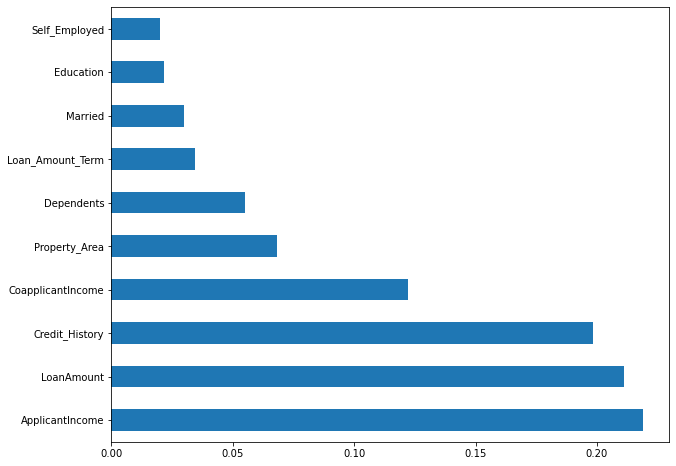

In [27]:
model=rf.fit(x_train,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_pt.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [28]:
feat_importances.nlargest(11)

ApplicantIncome      0.218793
LoanAmount           0.211289
Credit_History       0.198532
CoapplicantIncome    0.122338
Property_Area        0.068094
Dependents           0.055008
Loan_Amount_Term     0.034456
Married              0.029975
Education            0.021693
Self_Employed        0.019940
Gender               0.019881
dtype: float64

In [29]:
X_pt

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.495678,-1.331735,-0.794269,-0.521119,-0.376878,1.433795,1.504009,2.259738,0.094460,0.561874,-1.226043
1,0.495678,-1.331735,-0.794269,1.918946,-0.376878,-1.427369,-0.971871,0.351093,0.094460,0.561874,1.248533
2,0.495678,0.750900,-0.794269,-0.521119,-0.376878,-1.587871,0.351614,-0.632122,-0.302528,-1.779758,1.248533
3,-2.017440,-1.331735,0.820737,-0.521119,-0.376878,0.399159,-0.971871,-1.128444,0.094460,0.561874,0.023643
4,0.495678,0.750900,-0.794269,-0.521119,-0.376878,-0.424579,-0.971871,0.727411,0.094460,0.561874,-1.226043
...,...,...,...,...,...,...,...,...,...,...,...
791,0.495678,0.750900,-0.794269,-0.521119,-0.376878,-0.437006,0.722626,-0.438368,0.094460,0.561874,-1.226043
792,-2.017440,-1.331735,-0.794269,-0.521119,-0.376878,-0.676661,-0.971871,-1.409031,0.094460,0.561874,-1.226043
793,0.495678,0.750900,1.634335,-0.521119,-0.376878,0.100042,-0.971871,-2.357577,-2.624919,0.561874,-1.226043
794,0.495678,0.750900,0.820737,-0.521119,-0.376878,1.317430,-0.676348,1.735496,0.094460,0.561874,1.248533


In [316]:
X_final.columns

Index(['Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Property_Area'],
      dtype='object')

In [30]:
# Removing features- Loan_Amount_Term because of the high VIF from the above result

X_final=X_pt.drop(columns=["Loan_Amount_Term","Gender"],axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_final.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X_final.values, i)
                          for i in range(len(X_final.columns))]

print(vif_data)


             feature       VIF
0            Married  1.273572
1         Dependents  1.200229
2          Education  1.059448
3      Self_Employed  1.080258
4    ApplicantIncome  1.785423
5  CoapplicantIncome  1.600954
6         LoanAmount  1.691525
7     Credit_History  1.015008
8      Property_Area  1.046292


# Training Multiple Models

In [31]:
#Splitting data into Training and Testing Data
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [32]:
lr=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()
xgb = XGBClassifier()

lst=[lr,rf,kn,sv,dt,gb,xgb]

In [33]:
model=[]
acc_score_train=[]
acc_score_test=[]
F1s=[]
rocauc=[]
random=[]


for i1 in lst:
    for i2 in range(0,5):
        x_train,x_test,y_train,y_test=train_test_split(Xt,Y,random_state=i2,test_size=0.30)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)
        model.append(i1)
        acc_score_test.append(round(accuracy_score(y_test,pred_test)*100,2))
        acc_score_train.append(round(accuracy_score(y_train,pred_train)*100,2))
        F1s.append(round(f1_score(y_test,pred_test)*100,2))
        rocauc.append(round(roc_auc_score(y_test,pred_test),2))
        random.append(i2)
#Creating Dataframe of comparison between different models and their respective scores

modeldata=pd.DataFrame({"Model":model,"Random State":random,"Accuracy Score-Test":acc_score_test,"Accuracy Score-Train":acc_score_train,"F1 Score":F1s,"Roc_Auc Score":rocauc})
modeldata     

,Model,Random State,Accuracy Score-Test,Accuracy Score-Train,F1 Score,Roc_Auc Score
0,LogisticRegression(),0,74.06,74.33,78.17,0.74
1,LogisticRegression(),1,74.48,73.43,77.49,0.75
2,LogisticRegression(),2,75.73,73.79,79.72,0.75
3,LogisticRegression(),3,67.36,73.97,72.54,0.69
4,LogisticRegression(),4,78.66,73.97,81.18,0.79
5,"(DecisionTreeClassifier(max_features='auto', r...",0,90.38,100.00,89.96,0.90
6,"(DecisionTreeClassifier(max_features='auto', r...",1,90.38,100.00,90.04,0.90
7,"(DecisionTreeClassifier(max_features='auto', r...",2,87.45,100.00,87.70,0.88
8,"(DecisionTreeClassifier(max_features='auto', r...",3,88.28,100.00,87.72,0.88
9,"(DecisionTreeClassifier(max_features='auto', r...",4,92.05,100.00,91.70,0.92


In [58]:
x_train,x_test,y_train,y_test=train_test_split(Xt,Y,random_state=4,test_size=0.30)

# Logistic Regression

In [59]:
m1=lr.fit(x_train,y_train)
pred_train=m1.predict(x_train)
pred_test=m1.predict(x_test)

In [60]:
print(round(accuracy_score(y_train,pred_train),2)*100)

74.0


In [61]:
print(round(accuracy_score(y_test,pred_test),2)*100)

79.0


In [62]:
print(round(f1_score(y_train,pred_train),2)*100)

78.0


In [63]:
print(round(f1_score(y_test,pred_test),2)*100)

81.0


In [64]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.92      0.64      0.75       122
         1.0       0.71      0.94      0.81       117

    accuracy                           0.79       239
   macro avg       0.82      0.79      0.78       239
weighted avg       0.82      0.79      0.78       239



In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [66]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)

In [67]:
cv1=cross_val_score(m1,Xt,Y, scoring='accuracy', cv=cv)

In [68]:
print(round(cv1.mean(),2)*100)

73.0


# Random Forest Classifier

In [81]:
m2=rf.fit(x_train,y_train)
pred_train=m2.predict(x_train)
pred_test=m2.predict(x_test)

In [82]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [83]:
print(round(accuracy_score(y_test,pred_test),2)*100)

92.0


In [84]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [85]:
print(round(f1_score(y_test,pred_test),2)*100)

92.0


In [86]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       122
         1.0       0.93      0.91      0.92       117

    accuracy                           0.92       239
   macro avg       0.92      0.92      0.92       239
weighted avg       0.92      0.92      0.92       239



In [87]:
print(confusion_matrix(y_test,pred_test))

[[114   8]
 [ 10 107]]


In [88]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m2,Xt,Y, scoring='accuracy', cv=cv)

In [89]:
print(round(cv1.mean(),2)*100)

93.0


# K Neihbors Classifier

In [66]:
m3=kn.fit(x_train,y_train)
pred_train=m3.predict(x_train)
pred_test=m3.predict(x_test)

In [67]:
print(round(accuracy_score(y_train,pred_train),2)*100)

89.0


In [68]:
print(round(accuracy_score(y_test,pred_test),2)*100)

81.0


In [70]:
print(round(f1_score(y_train,pred_train),2)*100)

88.0


In [71]:
print(round(f1_score(y_test,pred_test),2)*100)

79.0


In [72]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       124
         1.0       0.81      0.78      0.79       109

    accuracy                           0.81       233
   macro avg       0.81      0.81      0.81       233
weighted avg       0.81      0.81      0.81       233



In [73]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m3,Xt,Y, scoring='accuracy', cv=cv)

In [74]:
print(round(cv1.mean(),2)*100)

78.0


# SVC

In [75]:
m4=sv.fit(x_train,y_train)
pred_train=m4.predict(x_train)
pred_test=m4.predict(x_test)

In [76]:
print(round(accuracy_score(y_train,pred_train),2)*100)

82.0


In [77]:
print(round(accuracy_score(y_test,pred_test),2)*100)

80.0


In [79]:
print(round(f1_score(y_train,pred_train),2)*100)

84.0


In [80]:
print(round(f1_score(y_test,pred_test),2)*100)

82.0


In [81]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.95      0.65      0.78       124
         1.0       0.71      0.96      0.82       109

    accuracy                           0.80       233
   macro avg       0.83      0.81      0.80       233
weighted avg       0.84      0.80      0.79       233



In [82]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m4,Xt,Y, scoring='accuracy', cv=cv)

In [83]:
print(round(cv1.mean(),2)*100)

77.0


# Decision Tree Classifier

In [84]:
m5=dt.fit(x_train,y_train)
pred_train=m5.predict(x_train)
pred_test=m5.predict(x_test)

In [85]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [86]:
print(round(accuracy_score(y_test,pred_test),2)*100)

87.0


In [88]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [90]:
print(round(f1_score(y_test,pred_test),2)*100)

85.0


In [91]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       124
         1.0       0.94      0.77      0.85       109

    accuracy                           0.87       233
   macro avg       0.89      0.87      0.87       233
weighted avg       0.88      0.87      0.87       233



In [92]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m5,Xt,Y, scoring='accuracy', cv=cv)

In [93]:
print(round(cv1.mean(),2)*100)

89.0


# Gaussian NB

In [104]:
m6=gb.fit(x_train,y_train)
pred_train=m6.predict(x_train)
pred_test=m6.predict(x_test)

In [105]:
print(round(accuracy_score(y_train,pred_train),2)*100)

75.0


In [106]:
print(round(accuracy_score(y_test,pred_test),2)*100)

76.0


In [107]:
print(round(f1_score(y_train,pred_train),2)*100)

79.0


In [108]:
print(round(f1_score(y_test,pred_test),2)*100)

79.0


In [109]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.59      0.72       124
         1.0       0.67      0.95      0.79       109

    accuracy                           0.76       233
   macro avg       0.80      0.77      0.76       233
weighted avg       0.81      0.76      0.75       233



In [102]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m6,Xt,Y, scoring='accuracy', cv=cv)

In [103]:
print(round(cv1.mean(),2)*100)

73.0


# XGBoost Classifier

In [52]:
m7=xgb.fit(x_train,y_train)
pred_train=m7.predict(x_train)
pred_test=m7.predict(x_test)

In [53]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [54]:
print(round(accuracy_score(y_test,pred_test),2)*100)

88.0


In [55]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [56]:
print(round(f1_score(y_test,pred_test),2)*100)

87.0


In [57]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       120
         1.0       0.94      0.81      0.87       119

    accuracy                           0.88       239
   macro avg       0.89      0.88      0.88       239
weighted avg       0.89      0.88      0.88       239



In [116]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m7,Xt,Y, scoring='accuracy', cv=cv)

In [117]:
print(round(cv1.mean(),2)*100)

92.0


#### From the above results, the Random Forest Classifier Model with random state-4 and test-size-0.30 has an accuracy score for test data- 92 and train data- 100 and F1 score-92 which is an effective model compared to other models.The model has achieved a cross validation score of 93.Hence, we will be performing hyperparameter tuning on the Random Forest Classifier Model.

# Hyperparamter Tuning

In [244]:
from sklearn.model_selection import RandomizedSearchCV

In [317]:
rf=RandomForestClassifier(n_estimators=30)

In [318]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 30,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [337]:
param_dist={"max_depth": [20,30,40,50],
            "criterion": ["gini", "entropy","log_loss"],
            'ccp_alpha': [0.0,0.1,0.2],
            "n_jobs":[1,2],}

In [338]:
samples=7  # number of random samples 
randomCV=RandomizedSearchCV(rf, param_distributions=param_dist,n_iter=samples,cv=3)

In [339]:
final=randomCV.fit(x_train,y_train)

In [340]:
print(final.best_params_)

{'n_jobs': 2, 'max_depth': 50, 'criterion': 'entropy', 'ccp_alpha': 0.0}


In [341]:
pred1=final.predict(x_test)
pred2=final.predict(x_train)

In [342]:
print(round(accuracy_score(y_train,pred2),2)*100)

100.0


In [343]:
print(round(accuracy_score(y_test,pred1),2)*100)

94.0


In [344]:
print(round(f1_score(y_train,pred2),2)*100)

100.0


In [345]:
print(round(f1_score(y_test,pred1),2)*100)

94.0


In [346]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94       122
         1.0       0.93      0.94      0.94       117

    accuracy                           0.94       239
   macro avg       0.94      0.94      0.94       239
weighted avg       0.94      0.94      0.94       239



In [347]:
print(round(roc_auc_score(y_test,pred1),2)*100)

94.0


In [348]:
print(confusion_matrix(y_test,pred1))

[[114   8]
 [  7 110]]


In [349]:
from sklearn import metrics

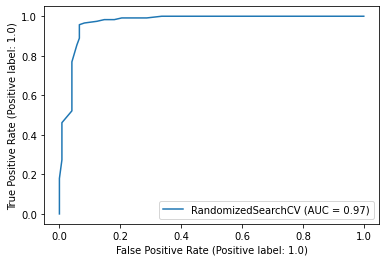

In [350]:
metrics.plot_roc_curve(final,x_test,y_test)
plt.show()

The developed model after hyperparameter tuning has reduced false negatives. Before tuning it was 10 and after tuning it is 7 and True negatives improved from 107 to 110 and improved accuracy score of 94%

# Saving Model

In [214]:
import pickle
pickle.dump(final, open('Loan_Status', 'wb'))

In [216]:
pickled_model=pickle.load(open('Loan_Status', 'rb'))
a=pickled_model.predict(x_test)